## Penguins

<img src= https://frenzy86.s3.eu-west-2.amazonaws.com/python/penguin.png width=600 >


#### Columns in the dataset
- species: penguin species (Chinstrap, Adélie, or Gentoo)
- island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
- bill_length_mm: bill length (mm)
- bill_length_mm: bill depth (mm)
- flipper_length_mm: flipper length (mm)
- body_mass_g: body mass (g)
- Sex: penguin sex

<img src= https://frenzy86.s3.eu-west-2.amazonaws.com/python/penguin2.png width=600 >


In [105]:
!wget https://frenzy86.s3.eu-west-2.amazonaws.com/python/penguins.csv

"wget" non � riconosciuto come comando interno o esterno,
 un programma eseguibile o un file batch.


In [106]:
path = "https://frenzy86.s3.eu-west-2.amazonaws.com/python/penguins.csv"

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn import datasets
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

import warnings
warnings.filterwarnings('ignore')

In [108]:
df = pd.read_csv(path)
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,male
1,Adelie,Torgersen,39.5,17.4,186,3800,female
2,Adelie,Torgersen,40.3,18.0,195,3250,female
3,Adelie,Torgersen,36.7,19.3,193,3450,female
4,Adelie,Torgersen,39.3,20.6,190,3650,male
...,...,...,...,...,...,...,...
328,Chinstrap,Dream,55.8,19.8,207,4000,male
329,Chinstrap,Dream,43.5,18.1,202,3400,female
330,Chinstrap,Dream,49.6,18.2,193,3775,male
331,Chinstrap,Dream,50.8,19.0,210,4100,male


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    int64  
 5   body_mass_g        333 non-null    int64  
 6   sex                333 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 18.3+ KB


In [110]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


In [111]:
#checking number of null values in the data
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [112]:
df['island'].value_counts()

island
Biscoe       163
Dream        123
Torgersen     47
Name: count, dtype: int64

In [113]:
df['island'].value_counts(normalize=True)

island
Biscoe       0.489489
Dream        0.369369
Torgersen    0.141141
Name: proportion, dtype: float64

In [114]:
df['species'].value_counts()

species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64

<Axes: ylabel='species'>

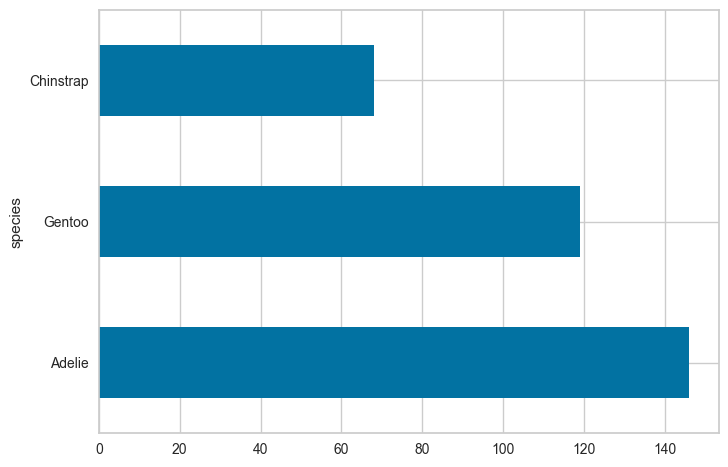

In [115]:
df['species'].value_counts().plot(kind='barh')

In [116]:
df['species'].value_counts(normalize=True)

species
Adelie       0.438438
Gentoo       0.357357
Chinstrap    0.204204
Name: proportion, dtype: float64

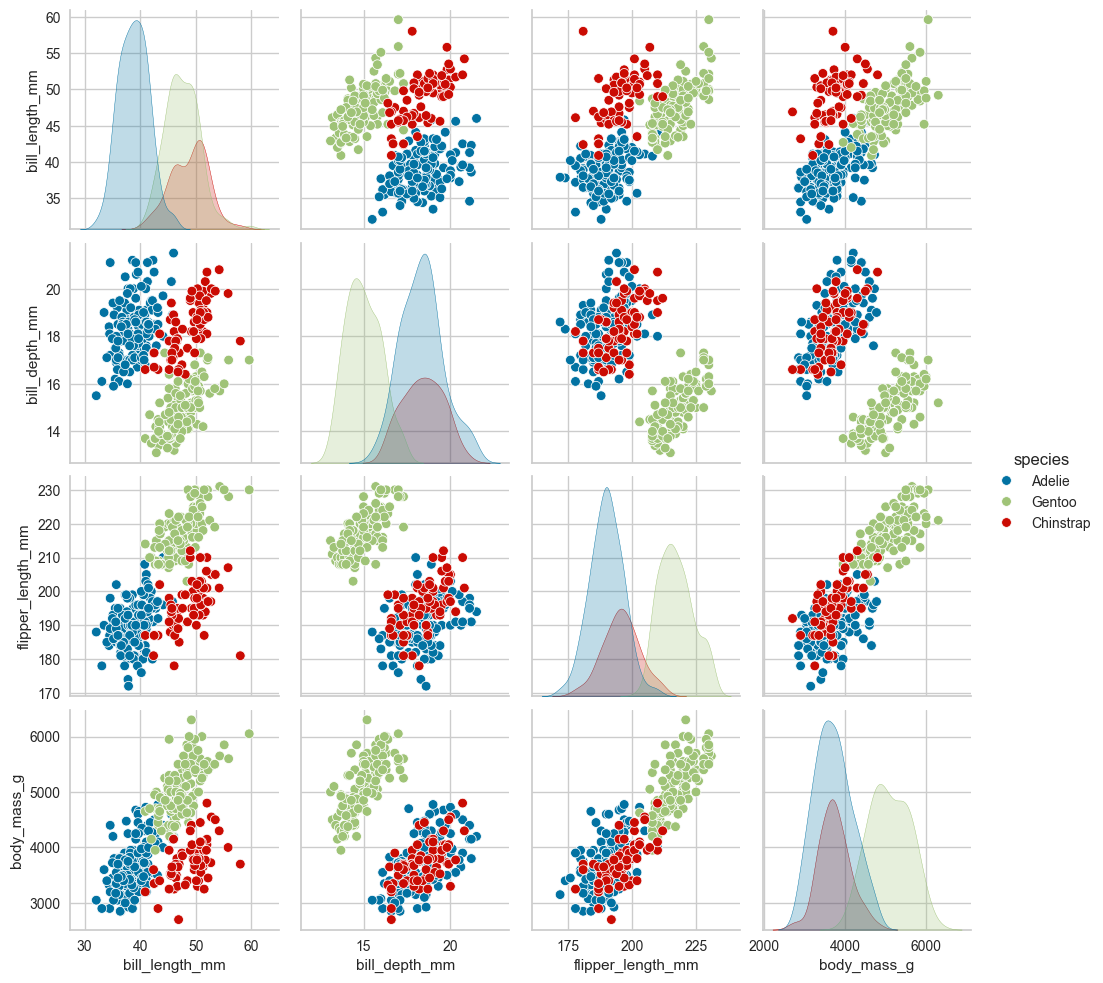

In [117]:
sns.pairplot(df,hue='species')

In [118]:
corrmat = df.corr(numeric_only=True)
corrmat

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.228626,0.653096,0.589451
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


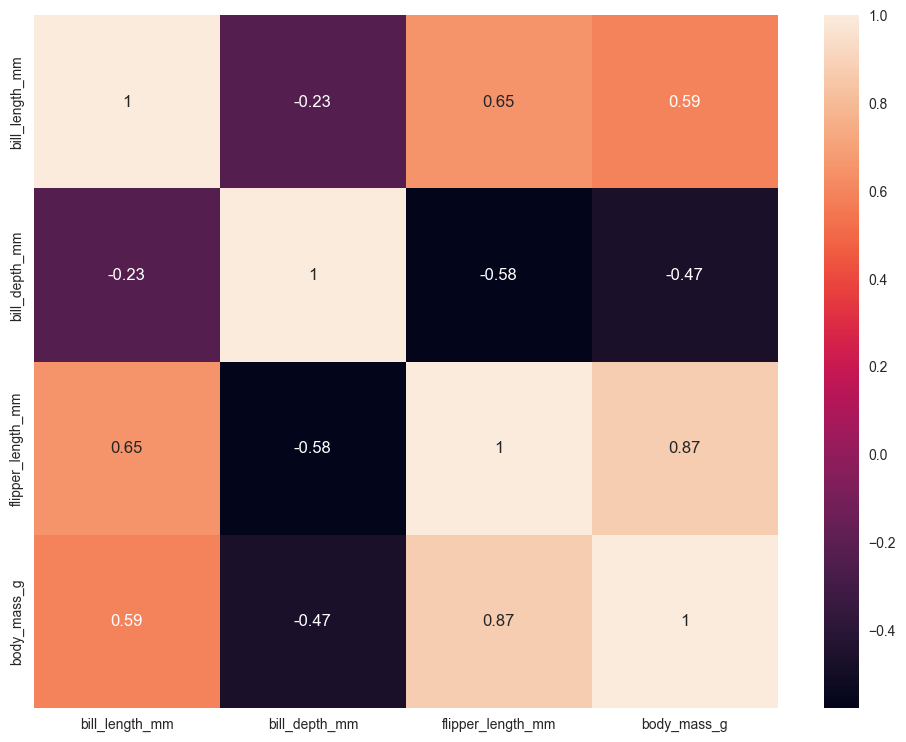

In [119]:
plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, annot = True, annot_kws={'size': 12});

<Axes: xlabel='species', ylabel='bill_length_mm'>

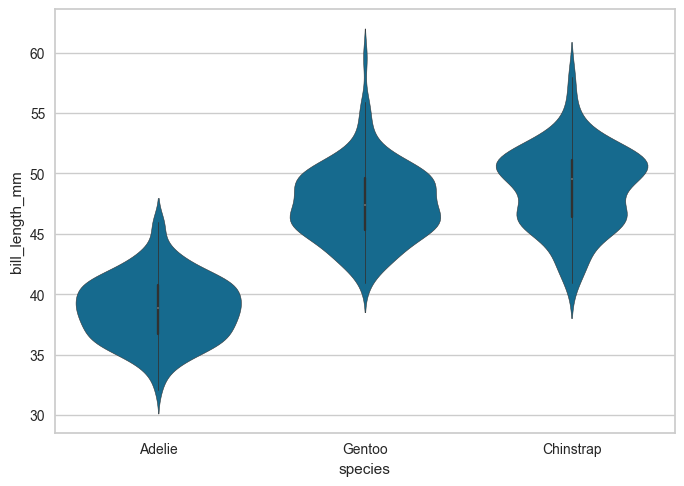

In [120]:
sns.violinplot(data=df, x="species", y="bill_length_mm")

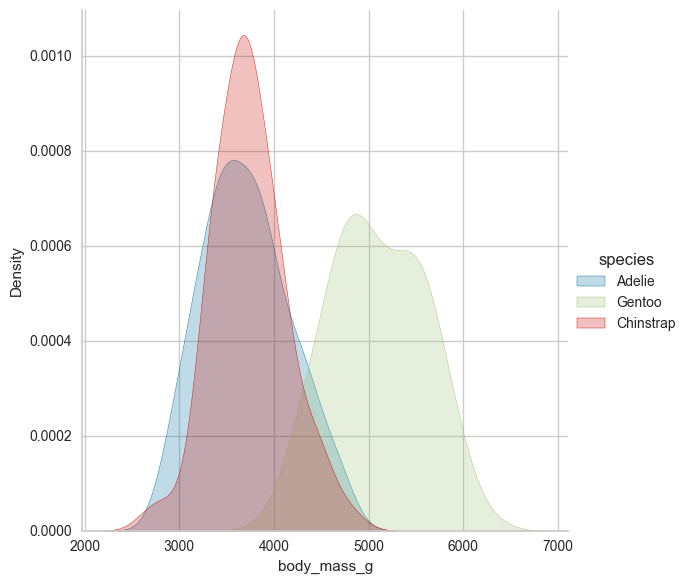

In [121]:
sns.FacetGrid(df, hue="species", height=6,).map(sns.kdeplot, "body_mass_g",fill=True).add_legend()

<Axes: xlabel='island', ylabel='count'>

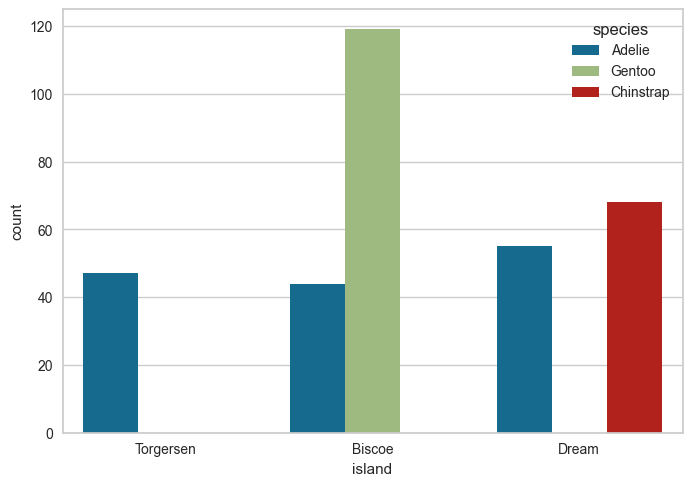

In [122]:
sns.countplot(data=df, x="island",hue='species')

Text(0, 0.5, 'Body Mass')

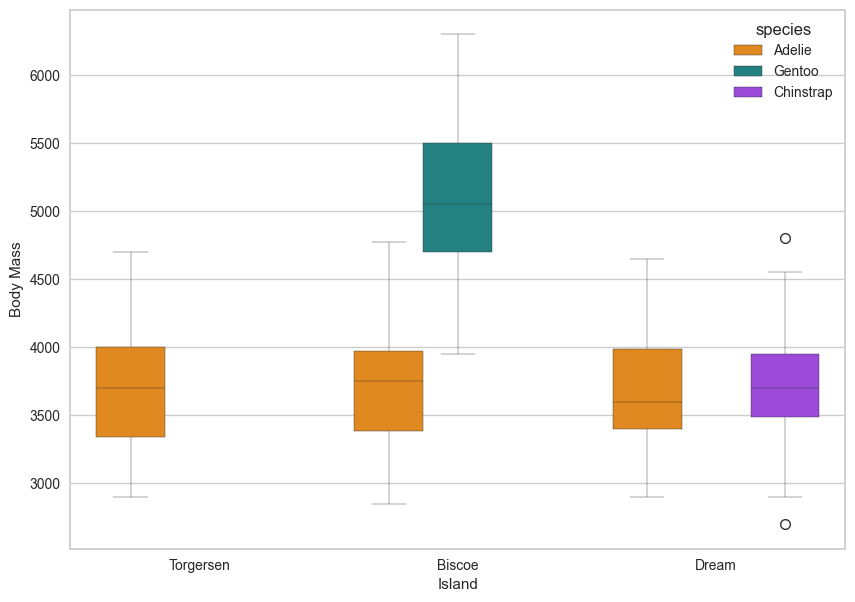

In [123]:
plt.figure(figsize = [10,7])
g = sns.boxplot(x = 'island',
            y ='body_mass_g',
            hue = 'species',
            data = df,
            palette=['#FF8C00','#159090','#A034F0'],
            linewidth=0.3)
g.set_xlabel('Island')
g.set_ylabel('Body Mass')

### K-MEANS

In [133]:
# Assumiamo che il dataset sia già caricato in "penguin"
X = penguin[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]

# Fitting il modello KMeans con 3 cluster
k = 3
k_means = KMeans(n_clusters=k, random_state=667)
k_means.fit(X)

# Aggiungiamo le etichette del cluster al DataFrame
penguin['cluster'] = k_means.labels_

#colori cluster
color = ['red' if label == 0 else 'purple' if label == 1 else 'green' if label == 2 else 'blue' for label in k_means.labels_]  # Colora in base ai cluster

# Creiamo il grafico 3D
fig = px.scatter_3d(penguin, 
                    x='bill_length_mm', 
                    y='bill_depth_mm', 
                    z='flipper_length_mm',
                    color=color,
                    title="Clustering KMeans dei Pinguini",
                    labels={'cluster': 'Cluster', 'bill_length_mm': 'Bill Length (mm)', 
                            'bill_depth_mm': 'Bill Depth (mm)', 'flipper_length_mm': 'Flipper Length (mm)'})

# Visualizziamo il grafico
fig.show()


### Advanced

In [ ]:
sns.relplot(x="bill_length_mm", y="body_mass_g", hue="species",
                col="island", row="sex", data=df);

In [ ]:
df['sex'].map({'male':0,'female':1})

In [ ]:
df = pd.get_dummies(df,columns = ['island','sex'],drop_first=True,dtype=int)
df

In [ ]:
X = df.drop(columns='species')
y = df['species']

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=667
                                                    )

In [ ]:
#Train the model with Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train) #Training the model

In [ ]:
model.intercept_ # un'intercepta per ogni classe

In [ ]:
model.coef_ # un Beta regress per ogni variabiel di input

In [ ]:
model.predict_proba(X_test)

In [ ]:
#Test the model
y_pred  = model.predict(X_test)
print(y_pred )# printing predictions

In [ ]:
confronto = pd.DataFrame(list(zip(y_pred,y_test)), columns=['predetti','reali'])
confronto

In [ ]:
import numpy as np
length = y_pred.shape[0] # 30
x = np.linspace(0,length,length)


plt.figure(figsize=(8,5))
plt.plot(x, y_test, label='test')
plt.plot(x, y_pred, label='predetto')
plt.legend(loc=2);

In [ ]:
X[0:1]

In [ ]:
model.predict([[39.1,18.7,181,3750,0,0,1,0,1]])[0]

In [ ]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test,y_pred)
print(f"L'accuracy totale è: {round(acc,2)*100}%")

## La cross Validation
The performance measure reported by k-fold cross-validation is then the average of the values computed in the loop. This approach can be computationally expensive, but does not waste too much data (as is the case when fixing an arbitrary validation set), which is a major advantage in problems such as inverse inference where the number of samples is very small.



<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/fav/cross_val.png" width=800 >


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5)
scores

In [ ]:
acc_cv = np.mean(scores).round(3)
acc_cv